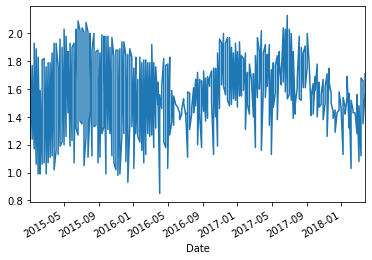

In [13]:
import pandas as pd

df = pd.read_csv("Datasets/avocado.csv")
df["Date"] = pd.to_datetime(df["Date"])
albany_df = df[df["region"] == "Albany"]
albany_df = albany_df.set_index("Date")
albany_df["AveragePrice"].plot()

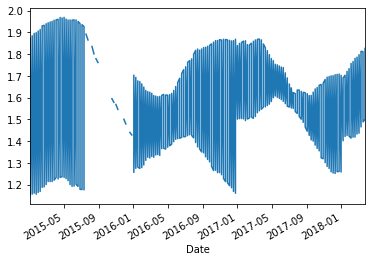

In [14]:
albany_df["AveragePrice"].rolling(25).mean().plot()

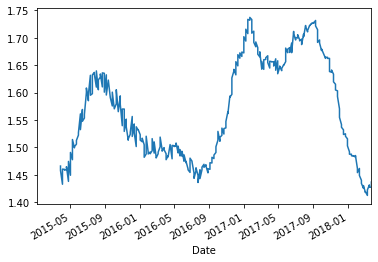

In [16]:
albany_df = albany_df.sort_index()
albany_df["AveragePrice"].rolling(25).mean().plot()

In [18]:
albany_df["price25ma"] = albany_df["AveragePrice"].rolling(25).mean()

In [21]:
albany_df.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,price25ma
Date,,,,,,,,,,,,,,
2015-01-04,51,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,NaN
2015-01-04,51,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany,NaN
2015-01-11,50,1.24,41195.08,1002.85,31640.34,127.12,8424.77,8036.04,388.73,0.0,conventional,2015,Albany,NaN
2015-01-11,50,1.77,1182.56,39.00,305.12,0.00,838.44,838.44,0.00,0.0,organic,2015,Albany,NaN
2015-01-18,49,1.17,44511.28,914.14,31540.32,135.77,11921.05,11651.09,269.96,0.0,conventional,2015,Albany,NaN


In [22]:
albany_df.tail()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,price25ma
Date,,,,,,,,,,,,,,
2018-03-11,2,1.68,2570.52,131.67,229.56,0.00,2209.29,2209.29,0.00,0.0,organic,2018,Albany,1.4224
2018-03-18,1,1.66,3154.45,275.89,297.96,0.00,2580.60,2577.27,3.33,0.0,organic,2018,Albany,1.4316
2018-03-18,1,1.35,105304.65,13234.86,61037.58,55.00,30977.21,26755.90,3721.31,500.0,conventional,2018,Albany,1.4276
2018-03-25,0,1.57,149396.50,16361.69,109045.03,65.45,23924.33,19273.80,4270.53,380.0,conventional,2018,Albany,1.4272
2018-03-25,0,1.71,2321.82,42.95,272.41,0.00,2006.46,1996.46,10.00,0.0,organic,2018,Albany,1.4368


In [26]:
albany_df.dropna().head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,price25ma
Date,,,,,,,,,,,,,,
2015-03-29,39,1.93,1082.44,24.75,173.26,0.00,884.43,884.43,0.00,0.00,organic,2015,Albany,1.4660
2015-03-29,39,1.02,67799.08,1402.28,58623.22,89.50,7684.08,7208.49,475.59,0.00,conventional,2015,Albany,1.4580
2015-04-05,38,1.16,47362.13,961.77,35577.66,93.76,10728.94,9869.16,755.61,104.17,conventional,2015,Albany,1.4328
2015-04-05,38,1.93,1526.10,15.75,202.52,0.00,1307.83,1307.83,0.00,0.00,organic,2015,Albany,1.4604
2015-04-12,37,1.76,1634.59,51.75,93.38,0.00,1489.46,1489.46,0.00,0.00,organic,2015,Albany,1.4600


In [27]:
# better way to work dataframes
albany_df = df.copy()[df["region"] == "Albany"]
albany_df = albany_df.set_index("Date")
albany_df = albany_df.sort_index()
albany_df["price25ma"] = albany_df["AveragePrice"].rolling(25).mean()

In [35]:
list(set(df["region"].values.tolist())) 

['Southeast',
 'Indianapolis',
 'RichmondNorfolk',
 'Sacramento',
 'SouthCentral',
 'Midsouth',
 'Atlanta',
 'California',
 'GreatLakes',
 'HarrisburgScranton',
 'BuffaloRochester',
 'LosAngeles',
 'Nashville',
 'Philadelphia',
 'Seattle',
 'Spokane',
 'CincinnatiDayton',
 'Boise',
 'StLouis',
 'Northeast',
 'NorthernNewEngland',
 'Portland',
 'Plains',
 'Albany',
 'Charlotte',
 'MiamiFtLauderdale',
 'Denver',
 'DallasFtWorth',
 'Louisville',
 'Tampa',
 'LasVegas',
 'Pittsburgh',
 'GrandRapids',
 'Roanoke',
 'HartfordSpringfield',
 'NewOrleansMobile',
 'RaleighGreensboro',
 'Columbus',
 'PhoenixTucson',
 'SanDiego',
 'NewYork',
 'Orlando',
 'Chicago',
 'SanFrancisco',
 'West',
 'Jacksonville',
 'Syracuse',
 'Detroit',
 'WestTexNewMexico',
 'SouthCarolina',
 'Boston',
 'TotalUS',
 'BaltimoreWashington',
 'Houston']

In [36]:
df["region"].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [38]:
graph_df = pd.DataFrame()

for region in df["region"].unique()[:16]:
    print(region)
    region_df = df.copy()[df["region"] == region]
    region_df = region_df.set_index("Date")
    region_df = region_df.sort_index()
    region_df[f"{region}_price25ma"] = region_df["AveragePrice"].rolling(25).mean()
    
    if graph_df.empty:
        graph_df = region_df[[f"{region}_price25ma"]]
    else:
        graph_df = graph_df.join(region_df[f"{region}_price25ma"])



Albany
Atlanta
BaltimoreWashington
Boise
Boston
BuffaloRochester
California
Charlotte
Chicago
CincinnatiDayton
Columbus
DallasFtWorth
Denver
Detroit
GrandRapids
GreatLakes


In [39]:
graph_df.tail()

,Albany_price25ma,Atlanta_price25ma,BaltimoreWashington_price25ma,Boise_price25ma,Boston_price25ma,BuffaloRochester_price25ma,California_price25ma,Charlotte_price25ma,Chicago_price25ma,CincinnatiDayton_price25ma,Columbus_price25ma,DallasFtWorth_price25ma,Denver_price25ma,Detroit_price25ma,GrandRapids_price25ma,GreatLakes_price25ma
Date,,,,,,,,,,,,,,,,
2018-03-25,1.4368,1.2884,1.3844,1.5016,1.588,1.2232,1.4232,1.4916,1.5708,1.2792,1.1704,1.118,1.2888,1.1492,1.3264,1.2788
2018-03-25,1.4368,1.2884,1.3844,1.5016,1.588,1.2232,1.4232,1.4916,1.5708,1.2792,1.1704,1.118,1.2888,1.1728,1.3164,1.2568
2018-03-25,1.4368,1.2884,1.3844,1.5016,1.588,1.2232,1.4232,1.4916,1.5708,1.2792,1.1704,1.118,1.2888,1.1728,1.3164,1.2788
2018-03-25,1.4368,1.2884,1.3844,1.5016,1.588,1.2232,1.4232,1.4916,1.5708,1.2792,1.1704,1.118,1.2888,1.1728,1.3264,1.2568
2018-03-25,1.4368,1.2884,1.3844,1.5016,1.588,1.2232,1.4232,1.4916,1.5708,1.2792,1.1704,1.118,1.2888,1.1728,1.3264,1.2788


In [62]:
import pandas as pd

df = pd.read_csv("Datasets/avocado.csv")
df = df.copy()[df["type"] == "organic"]
df["Date"] = pd.to_datetime(df["Date"])

df.sort_values(by="Date", ascending= True, inplace = True)

org_graph_df = pd.DataFrame()

for region in df["region"].unique():
    print(region)
    region_df = df.copy()[df["region"] == region]
    region_df = region_df.set_index("Date")
    region_df = region_df.sort_index()
    region_df[f"{region}_price25ma"] = region_df["AveragePrice"].rolling(25).mean()
    
    if org_graph_df.empty:
        org_graph_df = region_df[[f"{region}_price25ma"]]
    else:
        org_graph_df = org_graph_df.join(region_df[f"{region}_price25ma"])
        
org_graph_df.tail()

California
LasVegas
PhoenixTucson
BuffaloRochester
Spokane
LosAngeles
Philadelphia
Boston
StLouis
Louisville
Orlando
Southeast
Boise
MiamiFtLauderdale
NorthernNewEngland
BaltimoreWashington
Midsouth
Tampa
West
Northeast
Atlanta
Nashville
TotalUS
Syracuse
WestTexNewMexico
Jacksonville
Charlotte
Sacramento
GrandRapids
Roanoke
Denver
SanDiego
GreatLakes
RichmondNorfolk
DallasFtWorth
SanFrancisco
HarrisburgScranton
Pittsburgh
RaleighGreensboro
Seattle
HartfordSpringfield
Portland
CincinnatiDayton
SouthCarolina
Houston
Chicago
Plains
Indianapolis
SouthCentral
Columbus
Albany
Detroit
NewOrleansMobile
NewYork


,California_price25ma,LasVegas_price25ma,PhoenixTucson_price25ma,BuffaloRochester_price25ma,Spokane_price25ma,LosAngeles_price25ma,Philadelphia_price25ma,Boston_price25ma,StLouis_price25ma,Louisville_price25ma,Orlando_price25ma,Southeast_price25ma,Boise_price25ma,MiamiFtLauderdale_price25ma,NorthernNewEngland_price25ma,BaltimoreWashington_price25ma,Midsouth_price25ma,Tampa_price25ma,West_price25ma,Northeast_price25ma,Atlanta_price25ma,Nashville_price25ma,TotalUS_price25ma,Syracuse_price25ma,WestTexNewMexico_price25ma,Jacksonville_price25ma,Charlotte_price25ma,Sacramento_price25ma,GrandRapids_price25ma,Roanoke_price25ma,Denver_price25ma,SanDiego_price25ma,GreatLakes_price25ma,RichmondNorfolk_price25ma,DallasFtWorth_price25ma,SanFrancisco_price25ma,HarrisburgScranton_price25ma,Pittsburgh_price25ma,RaleighGreensboro_price25ma,Seattle_price25ma,HartfordSpringfield_price25ma,Portland_price25ma,CincinnatiDayton_price25ma,SouthCarolina_price25ma,Houston_price25ma,Chicago_price25ma,Plains_price25ma,Indianapolis_price25ma,SouthCentral_price25ma,Columbus_price25ma,Albany_price25ma,Detroit_price25ma,NewOrleansMobile_price25ma,NewYork_price25ma
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-02-25,1.9128,1.9120,1.7468,1.2912,2.1544,1.9024,1.6324,1.7636,1.9240,1.7044,1.8728,1.7116,2.0512,1.7140,1.6280,1.5836,1.7252,1.7204,1.8620,1.6940,1.8660,1.7296,1.7144,1.3156,1.8708,1.9856,2.0548,1.7956,1.3388,1.6136,1.7084,2.0276,1.5656,1.5244,1.5708,1.9960,1.5004,1.4004,2.1920,1.9684,1.9408,2.0144,1.7752,1.6184,1.6132,1.8160,1.8116,1.4928,1.5728,1.6064,1.5112,1.4980,1.5384,1.9308
2018-03-04,1.8876,1.8748,1.7404,1.2744,2.1040,1.8656,1.6260,1.7708,1.8868,1.6816,1.8512,1.6868,2.0176,1.7068,1.6224,1.5772,1.7084,1.7104,1.8220,1.6860,1.8288,1.7036,1.6940,1.3004,1.8372,1.9684,2.0180,1.7904,1.3232,1.5972,1.6880,1.9988,1.5460,1.5016,1.5536,1.9968,1.4972,1.3976,2.1556,1.9044,1.9336,1.9636,1.7564,1.5952,1.5960,1.8024,1.7900,1.4744,1.5592,1.5804,1.4992,1.4692,1.5288,1.9156
2018-03-11,1.8636,1.8440,1.7324,1.2652,2.0552,1.8284,1.6300,1.7824,1.8468,1.6508,1.8004,1.6484,1.9836,1.6904,1.6264,1.5732,1.6924,1.6916,1.7912,1.6868,1.7844,1.6688,1.6748,1.2932,1.8052,1.9264,1.9764,1.7896,1.3200,1.5828,1.6708,1.9668,1.5248,1.4920,1.5340,2.0016,1.4956,1.3968,2.1196,1.8516,1.9412,1.9192,1.7216,1.5612,1.5696,1.7836,1.7672,1.4540,1.5400,1.5496,1.5044,1.4444,1.5076,1.9092
2018-03-18,1.8516,1.8204,1.7216,1.2560,2.0012,1.8160,1.6304,1.7932,1.8192,1.6176,1.7712,1.6156,1.9520,1.6692,1.6284,1.5684,1.6768,1.6776,1.7644,1.6852,1.7412,1.6300,1.6588,1.2848,1.7772,1.8876,1.9444,1.7812,1.3148,1.5624,1.6700,1.9476,1.5012,1.4744,1.5196,1.9936,1.4956,1.3944,2.1016,1.8116,1.9436,1.8780,1.6860,1.5312,1.5360,1.7732,1.7452,1.4320,1.5204,1.5088,1.5140,1.4092,1.4860,1.8948
2018-03-25,1.8364,1.7968,1.7104,1.2416,1.9496,1.8016,1.6256,1.7984,1.7976,1.5844,1.7352,1.5820,1.9128,1.6392,1.6312,1.5568,1.6592,1.6484,1.7304,1.6804,1.6936,1.6004,1.6428,1.2700,1.7472,1.8380,1.9024,1.7720,1.3108,1.5532,1.6568,1.9268,1.4912,1.4672,1.5100,1.9776,1.4900,1.3936,2.0624,1.7564,1.9448,1.8300,1.6720,1.5004,1.5128,1.7672,1.7232,1.4160,1.5072,1.4848,1.5188,1.3964,1.4616,1.8876


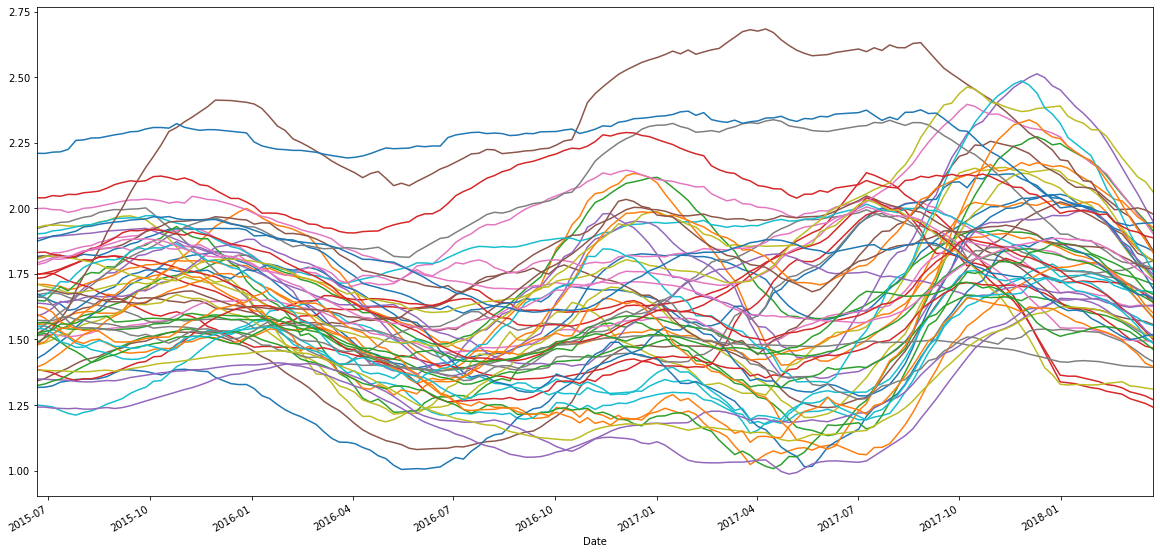

In [63]:
org_graph_df.dropna(inplace = True)
org_graph_df.plot(figsize=(20,10), legend=False)

In [65]:
import pandas as pd

df = pd.read_csv("Datasets/avocado.csv")
df = df.copy()[df["type"] == "conventional"]
df["Date"] = pd.to_datetime(df["Date"])

df.sort_values(by="Date", ascending= True, inplace = True)

con_graph_df = pd.DataFrame()

for region in df["region"].unique():
    print(region)
    region_df = df.copy()[df["region"] == region]
    region_df = region_df.set_index("Date")
    region_df = region_df.sort_index()
    region_df[f"{region}_price25ma"] = region_df["AveragePrice"].rolling(25).mean()
    
    if con_graph_df.empty:
        con_graph_df = region_df[[f"{region}_price25ma"]]
    else:
        con_graph_df = con_graph_df.join(region_df[f"{region}_price25ma"])
        
con_graph_df.tail()

California
Philadelphia
Southeast
BuffaloRochester
LasVegas
Orlando
Spokane
Boston
LosAngeles
NorthernNewEngland
StLouis
Jacksonville
Boise
Northeast
Syracuse
BaltimoreWashington
MiamiFtLauderdale
NewYork
Tampa
Atlanta
Midsouth
NewOrleansMobile
TotalUS
Louisville
WestTexNewMexico
SouthCentral
Indianapolis
Roanoke
GrandRapids
Denver
RichmondNorfolk
Sacramento
DallasFtWorth
GreatLakes
RaleighGreensboro
SanDiego
Columbus
PhoenixTucson
HarrisburgScranton
SanFrancisco
CincinnatiDayton
HartfordSpringfield
Plains
Seattle
Chicago
Houston
Pittsburgh
SouthCarolina
Charlotte
Portland
Albany
Detroit
Nashville
West


,California_price25ma,Philadelphia_price25ma,Southeast_price25ma,BuffaloRochester_price25ma,LasVegas_price25ma,Orlando_price25ma,Spokane_price25ma,Boston_price25ma,LosAngeles_price25ma,NorthernNewEngland_price25ma,StLouis_price25ma,Jacksonville_price25ma,Boise_price25ma,Northeast_price25ma,Syracuse_price25ma,BaltimoreWashington_price25ma,MiamiFtLauderdale_price25ma,NewYork_price25ma,Tampa_price25ma,Atlanta_price25ma,Midsouth_price25ma,NewOrleansMobile_price25ma,TotalUS_price25ma,Louisville_price25ma,WestTexNewMexico_price25ma,SouthCentral_price25ma,Indianapolis_price25ma,Roanoke_price25ma,GrandRapids_price25ma,Denver_price25ma,RichmondNorfolk_price25ma,Sacramento_price25ma,DallasFtWorth_price25ma,GreatLakes_price25ma,RaleighGreensboro_price25ma,SanDiego_price25ma,Columbus_price25ma,PhoenixTucson_price25ma,HarrisburgScranton_price25ma,SanFrancisco_price25ma,CincinnatiDayton_price25ma,HartfordSpringfield_price25ma,Plains_price25ma,Seattle_price25ma,Chicago_price25ma,Houston_price25ma,Pittsburgh_price25ma,SouthCarolina_price25ma,Charlotte_price25ma,Portland_price25ma,Albany_price25ma,Detroit_price25ma,Nashville_price25ma,West_price25ma
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-02-25,1.2716,1.4068,1.3208,1.3340,1.2048,1.3884,1.3516,1.4192,1.2260,1.3800,1.3824,1.3764,1.3660,1.4064,1.3760,1.4320,1.4292,1.4508,1.3832,1.1936,1.3184,1.2084,1.2372,1.2936,0.9620,0.9888,1.3120,1.1840,1.5680,1.2068,1.2216,1.3356,0.9720,1.3704,1.3396,1.2728,1.1820,0.8632,1.3332,1.3816,1.2496,1.4620,1.3168,1.5128,1.6548,0.9324,1.2812,1.2728,1.3992,1.3200,1.4896,1.2528,1.1480,1.1620
2018-03-04,1.2484,1.3996,1.3012,1.3232,1.1872,1.3656,1.3236,1.4016,1.2004,1.3644,1.3764,1.3504,1.3444,1.3908,1.3564,1.4192,1.4024,1.4356,1.3584,1.1752,1.3040,1.1848,1.2176,1.2736,0.9516,0.9716,1.2812,1.1656,1.5632,1.1848,1.2084,1.3176,0.9548,1.3488,1.3280,1.2540,1.1564,0.8396,1.3212,1.3596,1.2204,1.4460,1.2988,1.4872,1.6352,0.9168,1.2780,1.2624,1.3844,1.2916,1.4616,1.2280,1.1324,1.1380
2018-03-11,1.2240,1.3908,1.2788,1.3148,1.1712,1.3404,1.3092,1.3920,1.1724,1.3440,1.3484,1.3276,1.3256,1.3800,1.3460,1.4104,1.3764,1.4252,1.3344,1.1500,1.2880,1.1620,1.1984,1.2476,0.9412,0.9564,1.2468,1.1428,1.5408,1.1724,1.1908,1.3004,0.9400,1.3232,1.3172,1.2312,1.1304,0.8140,1.3116,1.3388,1.1892,1.4412,1.2784,1.4688,1.6108,0.9020,1.2756,1.2492,1.3708,1.2628,1.4500,1.2000,1.1108,1.1168
2018-03-18,1.1952,1.3808,1.2528,1.3036,1.1536,1.3116,1.2824,1.3824,1.1388,1.3348,1.3180,1.2996,1.2956,1.3700,1.3352,1.3932,1.3460,1.4164,1.3052,1.1280,1.2652,1.1348,1.1756,1.2132,0.9276,0.9376,1.2176,1.1212,1.5184,1.1492,1.1712,1.2780,0.9232,1.2964,1.2924,1.1984,1.1032,0.7928,1.3012,1.3236,1.1604,1.4348,1.2508,1.4376,1.5848,0.8836,1.2620,1.2288,1.3416,1.2316,1.4384,1.1708,1.0800,1.0928
2018-03-25,1.1660,1.3684,1.2292,1.2908,1.1296,1.2844,1.2552,1.3732,1.1088,1.3276,1.2948,1.2716,1.2748,1.3596,1.3272,1.3788,1.3192,1.4032,1.2800,1.1076,1.2452,1.1076,1.1512,1.1792,0.9124,0.9120,1.1860,1.0972,1.4936,1.1312,1.1536,1.2536,0.9004,1.2680,1.2768,1.1712,1.0728,0.7640,1.2916,1.2924,1.1292,1.4284,1.2232,1.4132,1.5536,0.8544,1.2600,1.2108,1.3240,1.2004,1.4336,1.1416,1.0500,1.0672


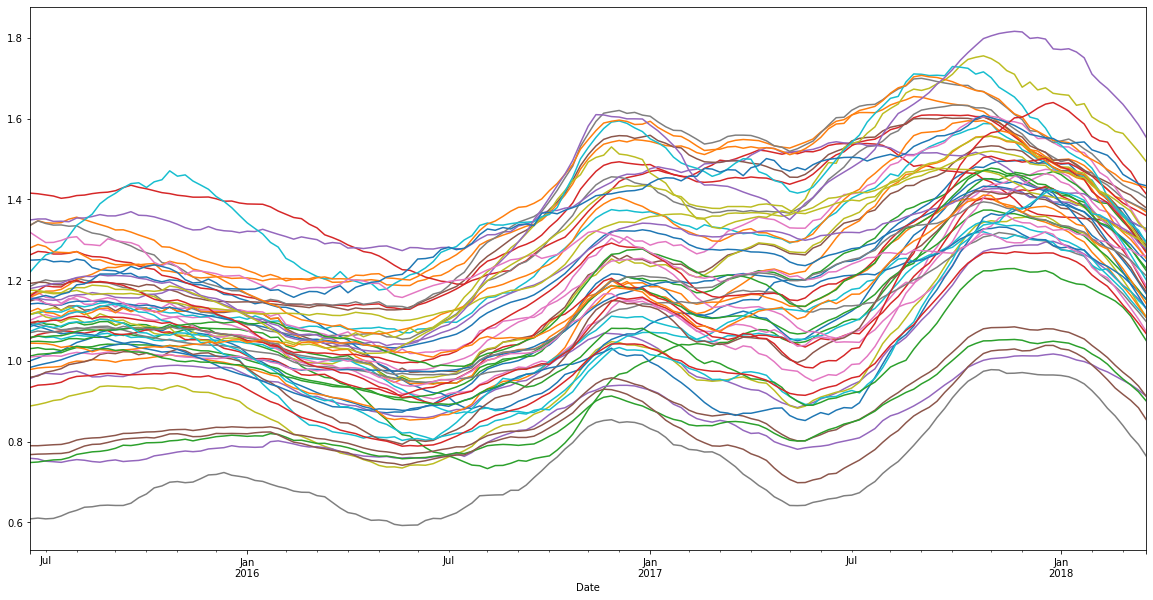

In [66]:
con_graph_df.dropna(inplace = True)
con_graph_df.plot(figsize=(20,10), legend=False)